# Individual Project Planning #
## Project Overview:
**Broad question addressed:** We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

We want players to contribute a large amount of data -> more playtime

**Specific question:** Can age predict playtime in PLAICraft servers?

## Data Description:
Full descriptive summary of the dataset:
1. Number of observations and summary statistics (2 decimal places) (Mean value for each quantitative variable in players.csv)
2. Variable: number, types and names, meaning, data collection methods
3. Exploratory visualizations (plots)
4. Data issues (observable and non-observable)



In [1]:
# load the data and the library:
library(tidyverse)
players <- read_csv("https://raw.githubusercontent.com/calentynes/indrepo/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/calentynes/indrepo/refs/heads/main/sessions.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimite

### 1. Number of observations and summary statistics:

In [2]:
#For players.csv:

summarystatistics_players <- summary(players)
summarystatistics_players #summary statistics

mean_players <- group_by(players) |>
      summarise(
        mean_hours = mean(played_hours, na.rm = TRUE),
        mean_age = mean(Age, na.rm = TRUE))

mean_players #mean value in a table format



  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

mean_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


If run players, we can see that the data is already tidy. There is one observation on each row, each column has one type of observation, and each cell has one observation. Therefore, we don't need to tidy the data.

In [3]:
head(players, n = 5) #showing first 5 rows to make my point
head(sessions, n = 5)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12


As can be seen above, the original_start_time and original_end_time columns aren't very readable since they are in UNIX (milliseconds) and don't provide useful data for our research question: we want to find out the total playtime of each observation. Moreover, date and time can be separated into different columns, since it could be argued that there is more than one observation in a single cell, making this data untidy. Now, we will compute summary statistics and tidy up data for sessions.csv:

In [38]:
useful_sessions <- sessions |>
    separate(col = start_time,
             into = c("start_date", "start_time"),
             sep = "\\s+",
            extra = "merge",
            fill = "right",
            convert = FALSE)|>
    separate(col = end_time,
            into = c("end_date", "end_time"),
             sep = "\\s+",
            extra = "merge",
             fill = "right",
             convert = FALSE) |>
    select(-original_start_time, -original_end_time) |>
    arrange(hashedEmail)

head(useful_sessions, n = 10) #only showing 5 rows to not make it messy 

hashedEmail,start_date,start_time,end_date,end_time
<chr>,<chr>,<chr>,<chr>,<chr>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,22/05/2024,23:12,23/05/2024,00:13
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,23/05/2024,00:22,23/05/2024,01:07
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,28/06/2024,04:28,28/06/2024,04:58
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,19/09/2024,21:01,19/09/2024,21:12
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,01/09/2024,21:59,01/09/2024,22:36
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,30/08/2024,03:40,30/08/2024,04:04
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,31/08/2024,03:14,31/08/2024,03:59
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,24/08/2024,03:15,24/08/2024,03:48
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,30/08/2024,17:49,30/08/2024,18:48


Now, we have a tidier data set. Now, we will compute summary statistics:

In [39]:
summarystatistics_sessions <- summary(useful_sessions)
summarystatistics_sessions

 hashedEmail         start_date         start_time          end_date        
 Length:1535        Length:1535        Length:1535        Length:1535       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
   end_time        
 Length:1535       
 Class :character  
 Mode  :character  

### 2. Variable: number, types and names, meaning, data collection methods

#### In players.csv:

- **Length: 196** — there are 196 observations
  
There are 7 categories:
1. **experience**
    - The level of Minecraft experience each player has in the 'character' data type. It has levels: Beginner, Amateur, Regular, Veteran, and Pro. This data was collected from a UBC qualtrics form question where the player can choose an experience level of Minecraft from 0 - 5, from "I've never played" (0, Beginner) to "I'm a pro" (5, Pro). A similar question proceeds this one, asking the level of familiarity with PLAICraft on a level from 0 - 5.
2. **subscribe**
   - The - in the 'logical' data type (true or false). It shows that 52/196 players have FALSE and 144/196 players have TRUE
3. **hashedEmail**
   - The email of each player in a hashed format (likely for privacy purposes), in the 'character' data type. Each player must provide their email address to play on the server, which is how the data was collected.
4. **played_hours**
   - The number of hours each player has played in the 'numeric' data type. mean_hours displays the average number of hours played for all players, $\approx 5.85$
5. **name**
   - The first name of each player in the 'character' data type. This data was likely obtained from when players need to input contact information.
6. **gender**
   - The gender of each player in the 'character' data type. Player choices are: Male, Female, Agender, Two-Spirited, Non-binary, and Prefer not to say—although it is unclear if these were all the available choices, or that there were more options that were not picked. These stats were likely taken from previous survey questions, similar to **experience**.
7. **Age**
   - The age of each player in the 'numerical' data type'. mean_age displays that the average age of all players is $\approx 21.14$. These stats were likely taken from previous survey questions, similar to **experience**.

#### In sessions.csv:

- **Length: 1535** — the are 1535 observations

There are 6 categories (after wrangling):
1. **hashedEmail**
   - Same as above
2. **start_date/start_time**
   - The player's playing session start date and start_time in the 'character' data type. Likely collected from the internal servers tracking player log-on.
3. **end_date/end_time**
   - The player's playing session end date and end time in the 'character' data type. Likely collected from the internal servers tracking player log-off.

###  3. Exploratory visualizations (plots)

We want to see the relationship between the total of playtime and player age. To do this, we can make a scatterplot graph. But first, we should combine the two dataframes and clean up the data so we only have relevant columns. We also will get rid of the multiple duplicate rows with unique().

Joining with `by = join_by(hashedEmail)`


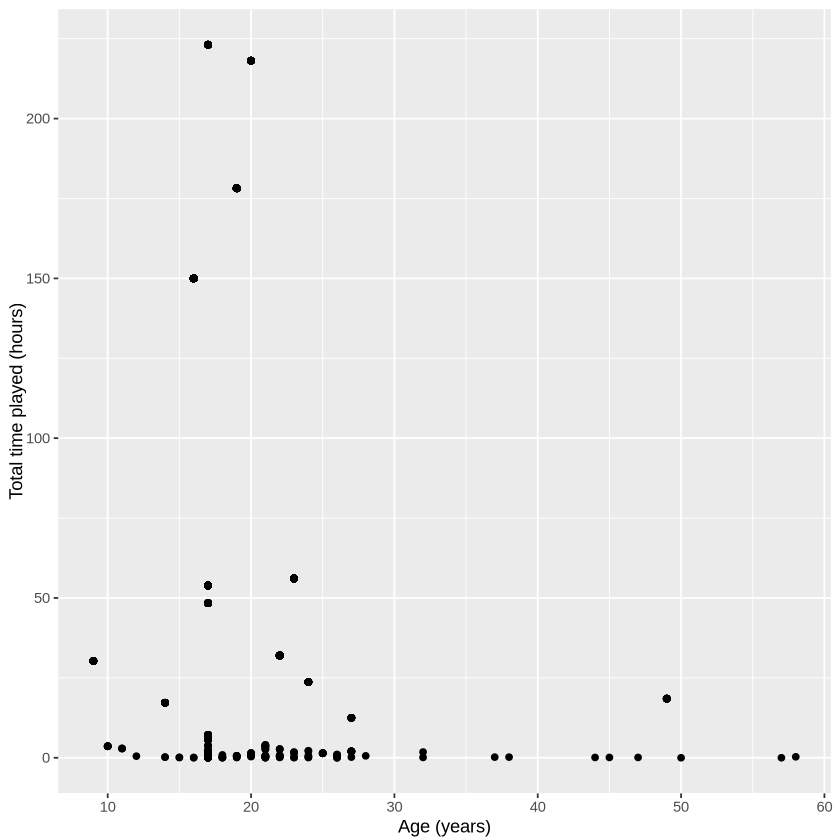

In [41]:
combined <- full_join(useful_sessions, players) |>
    na.omit() |>
    unique()
hours_vs_age <- combined |> ggplot(aes(x = Age, y = played_hours)) +
    geom_point() +
    labs(x = "Age (years)", y = "Total time played (hours)") 
hours_vs_age

From this graph, we can see that age does have an impact on total time played. Ages 15-25 have the most hours played. This answers our specific question, whether age can predict total time played. For the broad question, which "kinds" of players are most likely to contribute a large amount of data, we can say that younger players are most likely to play more of the game—contributing more data in the process. With this method, we can also see if other variables, like gender and experience, affect total time played using a bar graph.

# 4 